In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#read data
hrt = pd.read_csv('heart.csv')
hrt.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [3]:
hrt.shape

(918, 12)

In [4]:
hrt.describe(include = 'all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,914.000000,915,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,723,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.553611,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.424972,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [5]:
# describe gives the statistical summary of all columns

In [6]:
#checking null values
hrt.isna().sum()

Age               4
Sex               3
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [37]:
hrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    float64
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


In [8]:
#filling null values in age column with average age
hrt['Age'].fillna(np.mean(hrt['Age']),inplace = True)

In [9]:
#filling null values in sex column with mode
hrt['Sex'].value_counts()

Sex
M    723
F    192
Name: count, dtype: int64

In [10]:
hrt['Sex'].fillna('M',inplace = True)

In [11]:
#checking null values
hrt.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [12]:
#EXPLORATORY DATA ANALYISIS

In [13]:
gender = hrt.Sex.value_counts()
gender

Sex
M    726
F    192
Name: count, dtype: int64

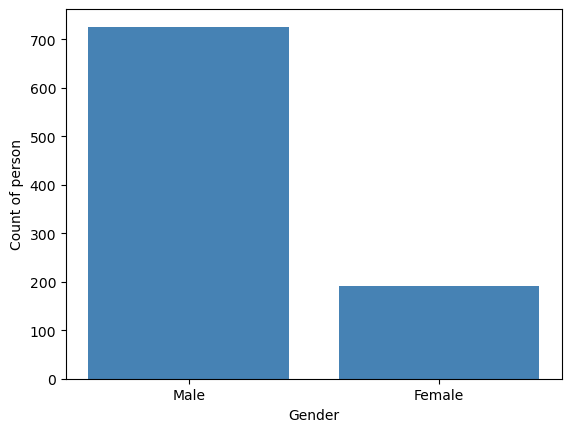

In [14]:
plt.bar(['Male' ,'Female'],gender.values,color ='steelblue')
plt.xlabel('Gender')
plt.ylabel('Count of person')
plt.show()

In [15]:
#A bar chart is used when you want to show a distribution of data points 
         #across different subgroups of data.

In [16]:
#TYPES OF CHEST PAIN

#ASY IS ASYMPTOMATIC :-No chest pain, but there may be signs of potential heart issues 
#ATA IS ATYPICAL ANGINA :-Chest pain that's not typical angina
#NAP IS NON ANGINAL PAIN :-Pain that's not related to the heart
#TA IS TYPICAL ANGINA :-A common type of chest pain related to the heart

In [17]:
cp = hrt.ChestPainType.value_counts()
cp                          
                      

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [18]:
#People with chestpaintype ASY is more 
#The people with chest pain type ASY>NAP>ATA>TA

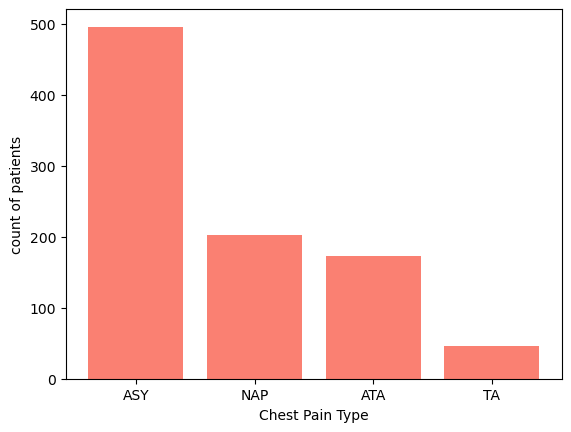

In [19]:
plt.bar(cp.index,cp.values,color = 'salmon')
plt.xlabel('Chest Pain Type')
plt.ylabel('count of patients')
plt.show()

In [20]:
#heart disease distribution
hd = hrt.HeartDisease.value_counts()
hd

HeartDisease
1    508
0    410
Name: count, dtype: int64

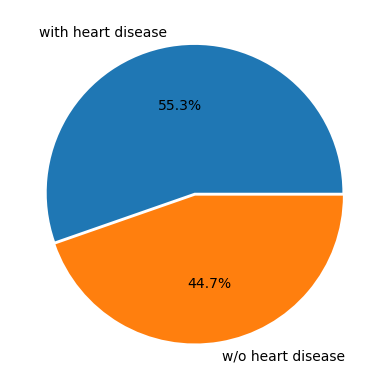

In [21]:
plt.pie(hd.values,labels= ['with heart disease','w/o heart disease'],autopct='%0.1f%%',
        explode=[0.01,0.01])
plt.show()

In [22]:
#HISTOGRAM#
      #Shows Frequency distribution of table....

In [23]:
# Histogram :-univariate graph used to analyze data that contains only one variable

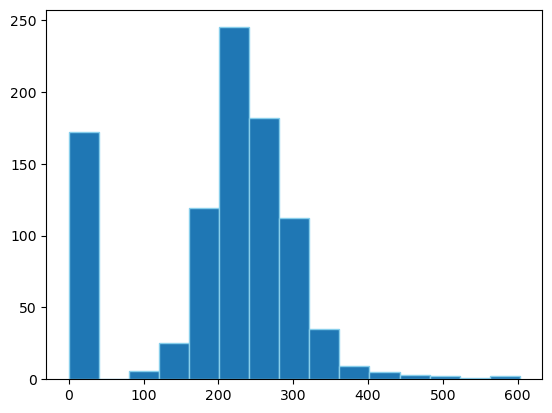

In [24]:
#distribution of cholestrol
plt.hist(hrt['Cholesterol'],bins=15,edgecolor = 'skyblue')
plt.show()

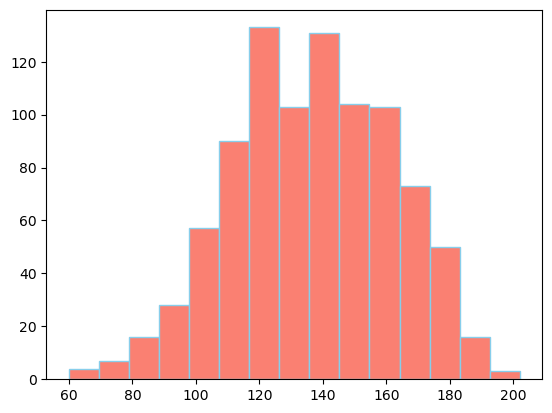

In [25]:
#distribution of heartrate
plt.hist(hrt.MaxHR,bins=15,color='salmon',edgecolor = 'skyblue')
plt.show()

In [26]:
#BOXPLOT
   # shows frequecy distribution in terms of Quartiles
   # to find outliers

In [27]:
##univariate chart##

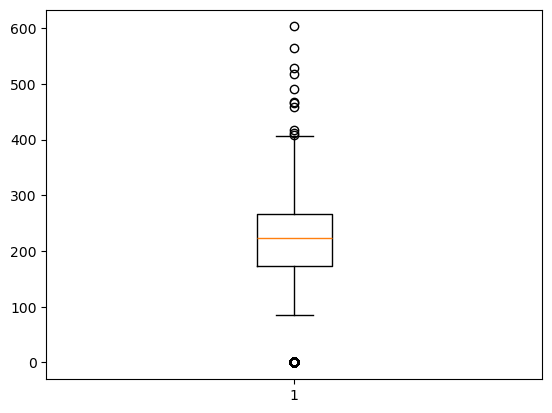

In [28]:
plt.boxplot(hrt['Cholesterol'])
plt.show()

In [29]:
#SCATTERPLOT:-
.it is bivariate data analysis graph
.it is used to show relationship between two continous numerical variables

SyntaxError: invalid syntax (586231368.py, line 2)

In [ ]:
plt.scatter(hrt['ChestPainType'],hrt['Age'])
plt.show()

In [ ]:
# with the increase in tha age the chest pain type differs

In [ ]:
plt.scatter(hrt.Cholesterol,hrt.RestingBP,color='SkyBlue')
plt.xlabel('Cholesterol value')
plt.ylabel('Bp at rest')
plt.show()

In [ ]:
##The graph shows that their is no conclusive evidence stating Bp changes due to cholesterol

In [ ]:
plt.scatter(hrt.Cholesterol,hrt.MaxHR,color ='Green')
plt.xlabel('Cholesterol value')
plt.ylabel('Heart Rate')
plt.show()

In [ ]:
#The graph shows that their is no conclusive evidence stating heart rate changes due to cholesterol

In [ ]:
#CLUSTERED BAR GRAPH#

#clusterd bar graph is achart that compares multiple categories of data within individual subitems......

In [ ]:
#clustered bar graph
sns.set_style('darkgrid')
sns.countplot(x = 'HeartDisease',hue = 'ChestPainType',data = hrt)
plt.show()

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x='HeartDisease',hue='ExerciseAngina',data = hrt)
plt.show()

In [ ]:
hrt.groupby('HeartDisease')['Cholesterol'].mean()

In [ ]:
hrt.groupby('HeartDisease')['RestingBP'].mean()

In [ ]:
#ENCODING:-ALL THE NON NUMERIC COLUMN ARE ENCODED USING LABEL ENCODER  TO CONVERT 
       #THEM INTO NUMERICAL REPRESENTATION............


In [ ]:
encode = LabelEncoder()
hrt['Sex'] = encode.fit_transform(hrt['Sex'])
hrt.ChestPainType = encode.fit_transform(hrt.ChestPainType)
hrt.RestingECG = encode.fit_transform(hrt.RestingECG)
hrt.ExerciseAngina = encode.fit_transform(hrt.ExerciseAngina)
hrt.ST_Slope = encode.fit_transform(hrt.ST_Slope)

In [ ]:
X = hrt.iloc[: , : -1]    #all rows and -1 columns
y = hrt.HeartDisease


In [ ]:
x_tr,x_te,y_tr,y_te = train_test_split(X,y,test_size = 0.25)

In [ ]:
#LOGISTIC REGRESSION
      #Binary Classificaion..........

In [ ]:
model = LogisticRegression()
model.fit(x_tr,y_tr)


In [ ]:
y_pr = model.predict(x_te)
print('the accuracy is :',accuracy_score(y_te,y_pr)*100)


In [ ]:
#Hyper parameter tunning using grid search CV
max_feat = [0.2,0.5,1.0]
max_dep = [2,3,4,5,6,7]
param_grid = {'max_features':max_feat,'max_depth':max_dep}

model = DecisionTreeClassifier()
cls = GridSearchCV(estimator=model,param_grid=param_grid,cv =5,n_jobs=-1,verbose = 2)

cls.fit(x_tr,y_tr)


In [ ]:
#getting best parameter combination
cls.best_params_


In [ ]:
#tunning decision tree with best paramters
model = DecisionTreeClassifier(max_depth=5,max_features=0.5)
model.fit(x_tr,y_tr)
y_pr = model.predict(x_te)
acc = accuracy_score(y_te,y_pr)*100
accuracies.append(acc)

In [ ]:
accuracies

In [ ]:
#APPLYING KNN 
k_vals = [1,2,3,4,5,6,7,8,9,10]
accus = []
for i in k_vals:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_tr,y_tr)
    y_pred = model.predict(x_te)
    accus.append(accuracy_score(y_te,y_pred)*100)

In [ ]:
accus

In [ ]:
#as we get best accuracy for k =7,use that value for no of neighbors
model = KNeighborsClassifier(n_neighbors=7)
model.fit(x_tr,y_tr)
y_pred = model.predict(x_te)
accuracies.append(accuracy_score(y_te,y_pred)*100)

In [ ]:
accuracies

In [ ]:
#APPLYING SVM 
model= SVC()
model.fit(x_tr,y_tr)
y_pred = model.predict(x_te)
accuracy_score(y_te,y_pred)*100
accuracies.append(acc)
accuracies

In [ ]:
##NAIVE BAYES
model =GaussianNB()
model.fit(x_tr,y_tr)
y_pred = model.predict(x_te)
accuracies.append(accuracy_score(y_te,y_pred)*100)
accuracies

In [ ]:
#using ensemble random forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_tr,y_tr)
y_pred = model.predict(x_te)
accuracies.append(accuracy_score(y_te,y_pred)*100)
accuracies

In [ ]:
fig = plt.figure(figsize=(8,4))
classifiers = ['log.reg','decision tree','KNN','SVM','Naive Bayes','Random Forest']
plt.bar(classifiers,accuracies,color='Lightblue',edgecolor='black')
plt.xlabel('classifiers used')
plt.ylabel('accuracies obtained')
plt.title('comparison of various ML classification Algorithms')
plt.show()